# Joining Yelp Data to Original Dataset, Coffee

#### Import dependencies

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read in CSVs

In [81]:
csv1 = pd.read_csv('joinable_kc_dataset.csv')
csv2 = pd.read_csv('most_of_yelp_coffee.csv')

In [82]:
joinable_raw_data = pd.DataFrame(csv1)
coffee_ratings = pd.DataFrame(csv2)

#### View the datasets

In [15]:
joinable_raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999"
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999"
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999"
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393"
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999"


In [83]:
coffee_ratings.head()

,lat+long_group,Review Count,Average Rating,Weighted Rating
0,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5
1,"47.71654017857156,-122.3089999999999",471,3.324841,1566.0
2,"47.73874375000014,-122.2249999999999",0,NaN,NaN
3,"47.51670803571437,-122.393",144,4.500000,648.0
4,"47.61662410714297,-122.0569999999999",0,NaN,NaN


#### Join datasets

In [86]:
df = pd.merge(joinable_raw_data, coffee_ratings, on='lat+long_group')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Review Count,Average Rating,Weighted Rating
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5
1,1895000260,20140721T000000,207950,2,2.00,890,5000,1.0,0,0,...,47.5158,-122.264,1860,5000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5
2,1895000045,20150504T000000,195000,2,1.00,820,5100,1.0,0,0,...,47.5156,-122.262,1170,5304,47.516708,-122.253,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5
3,770000045,20141024T000000,405600,5,1.50,2830,4000,2.5,0,0,...,47.5132,-122.262,1480,4000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5
4,8073000550,20150415T000000,1700000,4,3.75,3190,17186,2.0,1,4,...,47.5115,-122.246,2290,13496,47.516708,-122.253,"47.51670803571437,-122.2529999999999",709,4.155853,2946.5


#### Drop rows with no data

In [85]:
len(df)

21318

In [19]:
df2 = df.dropna()

In [87]:
len(df2)

17086

#### Plot

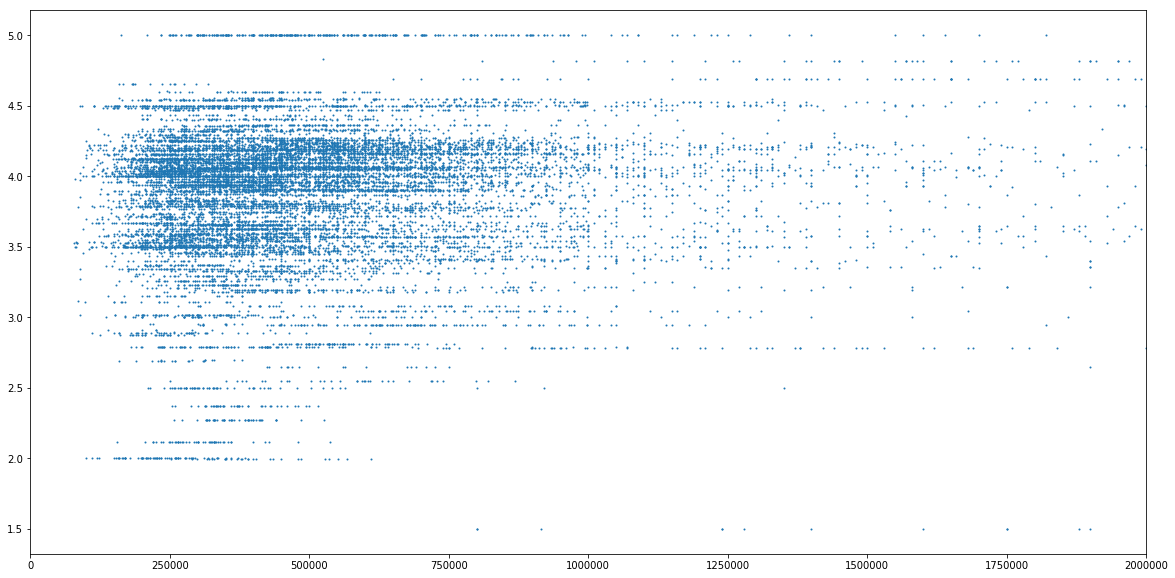

In [109]:
plt.figure(figsize=(20,10))
plt.scatter(df2['price'], df2['Average Rating'], s=1)
plt.xlim(0,2000000)
plt.show()

#### Linear Regression

In [94]:
fig, ax = plt.subplots()
fit = np.polyfit(df2['price'], df2['Average Rating'], deg=1)
ax.plot(df2['price'], fit[0] * df2['price'] + fit[1], color='red')
ax.scatter(df2['price'], df2['Average Rating'], s=1)



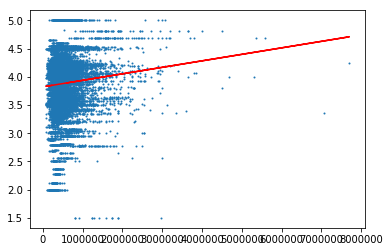

In [95]:
plt.show()

#### Pearson's Correlation

In [91]:
df2['price'].corr(df2['Average Rating'])

0.089107709686061992

In [96]:
df2['price'].corr(df2['Weighted Rating'])

0.14421961461807623

In [97]:
df2['price'].corr(df2['Review Count'])

0.14363123483069418

Correlation is very weak